In [8]:
import os
import pandas as pd
import mglearn
import numpy as np
adult_path = os.path.join(mglearn.datasets.DATA_PATH,'adult.data')
data = pd.read_csv(
     adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age','workclass','education','gender','hours-per-week',
           'occupation','income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
data_dummies = pd.get_dummies(data)

In [10]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X= features.values
y = data_dummies['income_ >50K'].values

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf = LogisticRegression().fit(X_train,y_train)
print('Test accuracy {:.3f}'.format(clf.score(X_test,y_test)))

Test accuracy 0.811


In [12]:
demo_df = pd.DataFrame({'Integer Feature' : [0,1,2,1],
                      'Categorical Feature' : ['socks','fox','socks','box']})
pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3,3,10000,endpoint=False).reshape(-1,1)
plt.figure()
reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label='Linear Regressor')

reg =DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label = 'Decision Tree Regressor')
plt.scatter(X,y,c='k')
plt.legend();

<IPython.core.display.Javascript object>

## Making Linear model powerful

In [14]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X,bins=bins)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
X_binned = encoder.fit_transform(which_bin)
plt.figure()
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg =LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),c='orange',label='Linear Regressor',)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'r--',label='Decision Tree Regressor')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.scatter(X[:,0],y,c='k')
plt.legend()

<IPython.core.display.Javascript object>

In [16]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [17]:
reg = LinearRegression().fit(X_combined, y)

plt.figure()
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

<IPython.core.display.Javascript object>

In [18]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [19]:
reg  = LinearRegression().fit(X_product,y)

plt.figure()
line_product = np.hstack([line_binned,line*line_binned])

plt.plot(line,reg.predict(line_product),label='Linear Regressor Product')
plt.scatter(X[:,0],y,c='k',label='actual data');
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2,label='bins')
plt.legend();

<IPython.core.display.Javascript object>

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree =10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [21]:
X_poly.shape

(100, 10)

In [22]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)

plt.figure()
plt.plot(line,reg.predict(line_poly),label ='Polynomail Linear Regressor')
plt.scatter(X[:,0],y,c='k',label='Data Points')

<IPython.core.display.Javascript object>

In [23]:
from sklearn.svm import SVR
plt.figure()
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.scatter(X[:,0],y,c='k',label='Data Points')
plt.legend();

<IPython.core.display.Javascript object>

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
boston = load_boston()
X_train,X_test,y_train,y_test  =train_test_split(boston.data,boston.target,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly =poly.transform( X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [26]:
from sklearn.linear_model import Ridge
ridge =Ridge().fit(X_train_scaled,y_train)
print('WIthout poly Score {:.4f}'.format(ridge.score(X_test_scaled,y_test)))
ridge =Ridge().fit(X_train_poly,y_train)
print('WIth poly Score {:.4f}'.format(ridge.score(X_test_poly,y_test)))


WIthout poly Score 0.6214
WIth poly Score 0.7534


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor(n_estimators = 100).fit(X_train_scaled,y_train)
print('WIthout poly Score {:.4f}'.format(rf.score(X_test_scaled,y_test)))
rf =RandomForestRegressor(n_estimators = 100).fit(X_train_poly,y_train)
print('WIth poly Score {:.4f}'.format(rf.score(X_test_poly,y_test)))


WIthout poly Score 0.7811
WIth poly Score 0.7842


## Univarirate Non Linear Transformations

In [28]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [29]:
plt.figure()
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

<IPython.core.display.Javascript object>

In [30]:
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test = train_test_split(X,y)
ridge = Ridge().fit(X_train,y_train)
print('Test Score{:.4f}'.format(ridge.score(X_test,y_test)))

Test Score0.5916


In [31]:
X_train_log = np.log(X_train+1)
X_test_log= np.log(X_test+1)

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_log,y_train)
print('Test Score{:.4f}'.format(ridge.score(X_test_log,y_test)))

Test Score0.8584


## Automatic Feature Selection

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data),50))

X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,
                                                random_state=0,test_size =.5)

select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [ ]:
mask= select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [36]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

lr= LogisticRegression().fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


## Model based Feature Selection

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [41]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


<IPython.core.display.Javascript object>


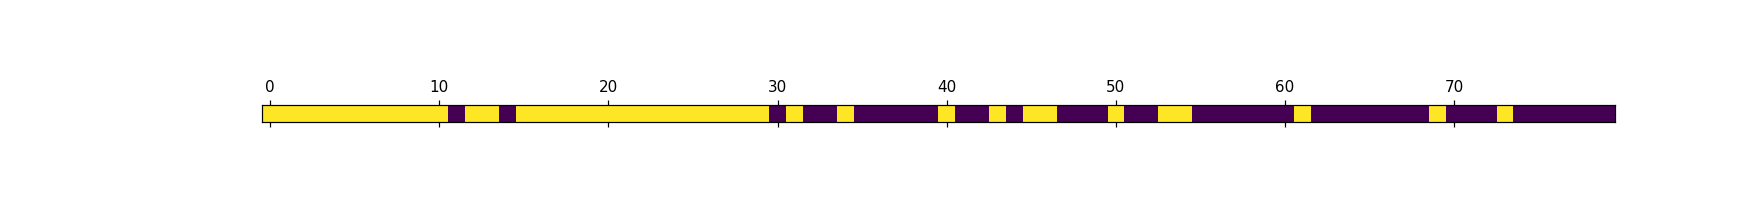

([], <a list of 0 Text yticklabel objects>)

In [46]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
plt.yticks(())


In [53]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print('Test Score {:.3f}'.format(score) )

Test Score 0.951
